# ENTREGABLE 2

# INSTRUCCIONES

Realizar la segunda fase del análisis exploratorio usando el archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

# Problema

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# El set de datos después de la limpieza

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [109]:
# imports
import pandas as pd

In [110]:
ruta = "dataset_banco_clean.csv"
df = pd.read_csv(ruta)

In [111]:
print(df.shape)
df.head()

(45189, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


# Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

Para cada una de ellas generar un pequeño resumen

## Análisis univariante

### Age

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14196\2238995316.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['age'], shade=True, color="blue", legend=False)


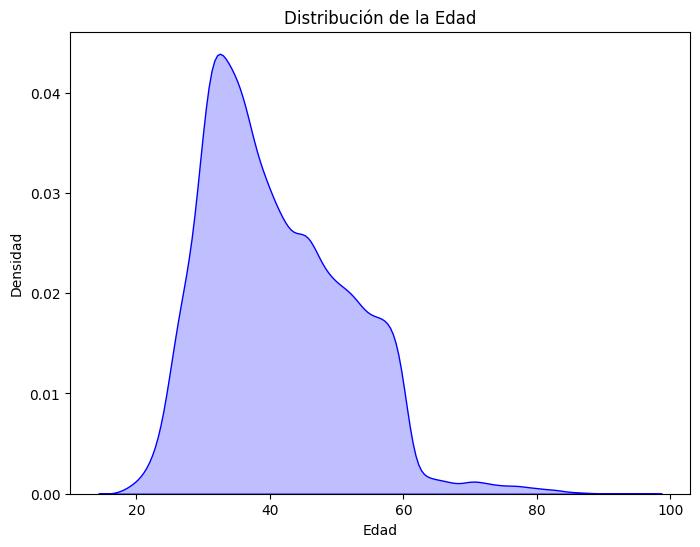

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de densidad
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.kdeplot(df['age'], shade=True, color="blue", legend=False)

# Personalizar el gráfico
plt.title('Distribución de la Edad')  # Título del gráfico
plt.xlabel('Edad')  # Etiqueta del eje x
plt.ylabel('Densidad')  # Etiqueta del eje y

# Mostrar el gráfico
plt.show()


### Job

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14196\3493029973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job', data=df, order = df['job'].value_counts().index, palette='viridis')


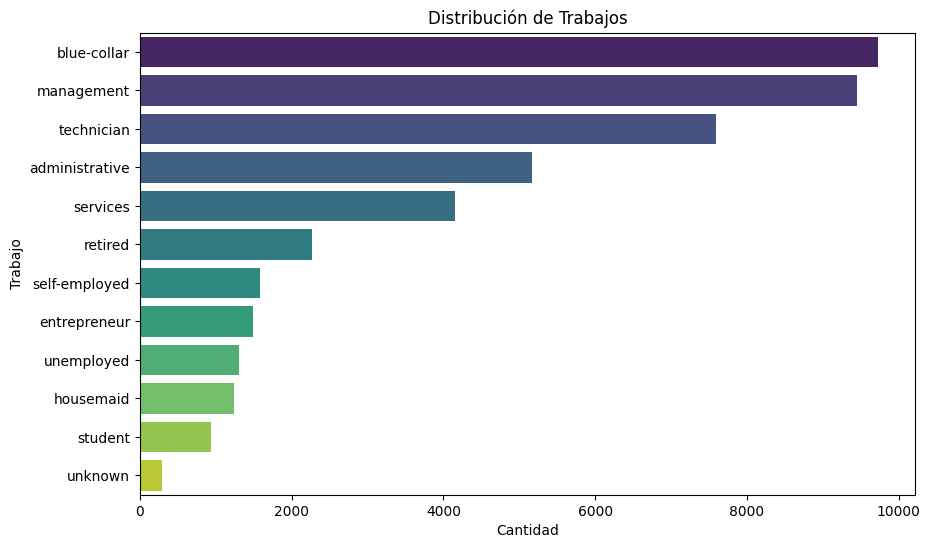

In [113]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.countplot(y='job', data=df, order = df['job'].value_counts().index, palette='viridis')

# Personalizar el gráfico
plt.title('Distribución de Trabajos')  # Título del gráfico
plt.xlabel('Cantidad')  # Etiqueta del eje x
plt.ylabel('Trabajo')  # Etiqueta del eje y

# Mostrar el gráfico
plt.show()


### Martial

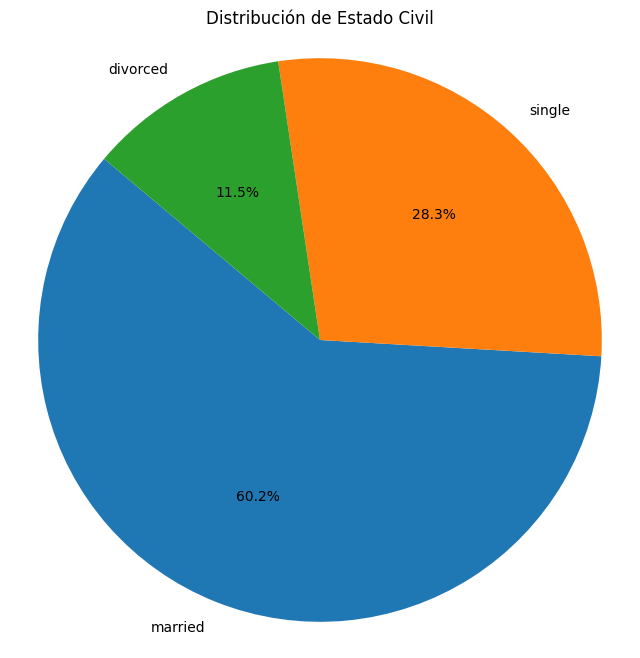

In [114]:
# Contar la frecuencia de cada categoría de 'marital'
marital_counts = df['marital'].value_counts()

# Crear el gráfico de tarta
plt.figure(figsize=(8, 8))  # Tamaño del gráfico
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)

# Añadir un título
plt.title('Distribución de Estado Civil')

# Mostrar el gráfico
plt.axis('equal')  # Hace que el gráfico sea circular
plt.show()


### Education

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14196\847192635.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=df, order=df['education'].value_counts().index, palette='muted')


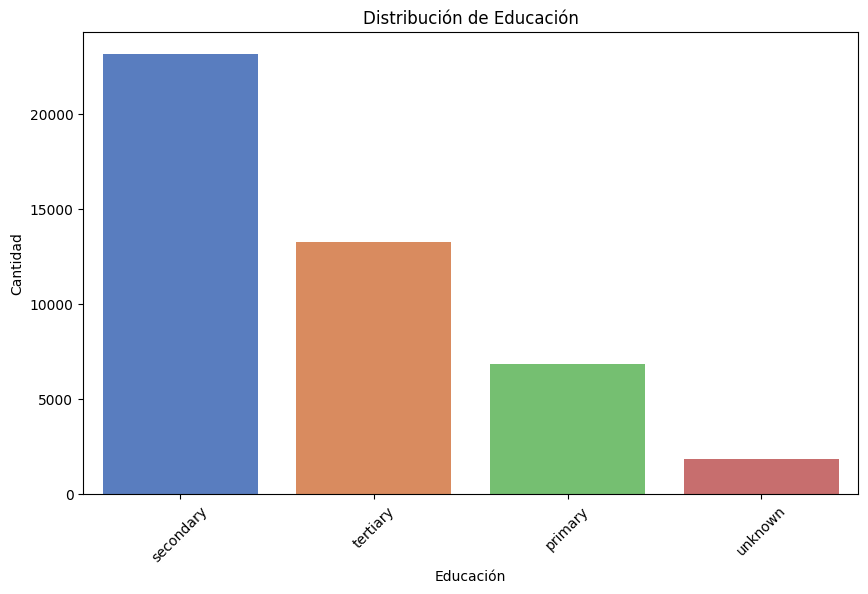

In [115]:
# Crear el gráfico de barras vertical
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.countplot(x='education', data=df, order=df['education'].value_counts().index, palette='muted')

# Personalizar el gráfico
plt.title('Distribución de Educación')  # Título del gráfico
plt.xlabel('Educación')  # Etiqueta del eje x
plt.ylabel('Cantidad')  # Etiqueta del eje y

# Rotar las etiquetas del eje x para mejor visualización si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


### Default

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14196\1630444130.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default', data=df, palette='colorblind')


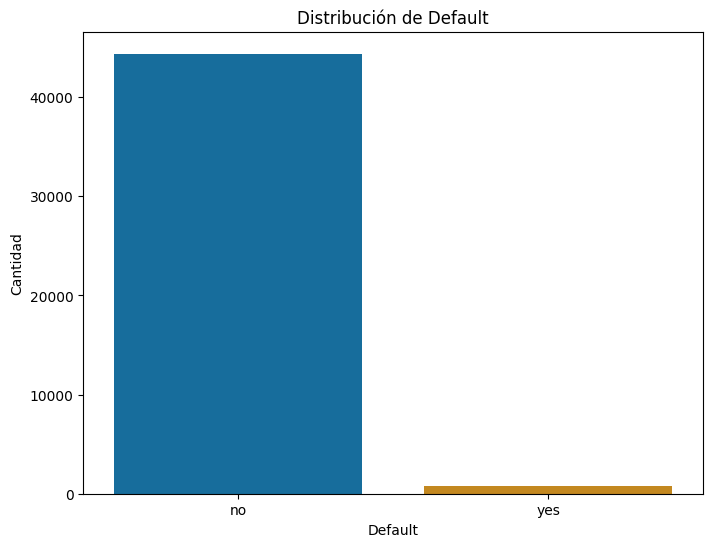

In [116]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.countplot(x='default', data=df, palette='colorblind')

# Personalizar el gráfico
plt.title('Distribución de Default')  # Título del gráfico
plt.xlabel('Default')  # Etiqueta del eje x
plt.ylabel('Cantidad')  # Etiqueta del eje y

# Mostrar el gráfico
plt.show()

### Balance

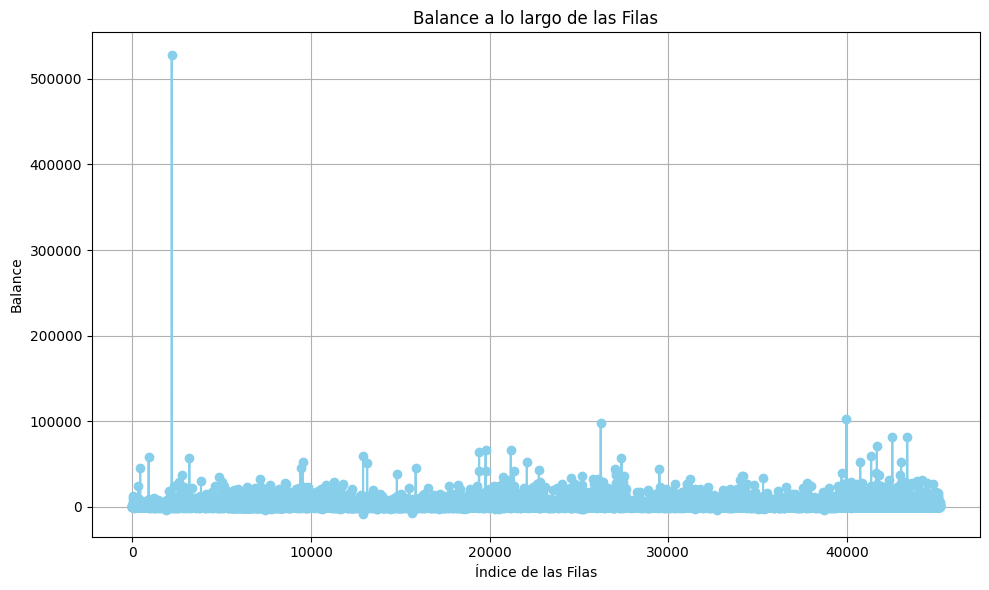

In [117]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.plot(df['balance'], color='skyblue', marker='o', linestyle='-')

# Personalizar el gráfico
plt.title('Balance a lo largo de las Filas')  # Título del gráfico
plt.xlabel('Índice de las Filas')  # Etiqueta del eje x
plt.ylabel('Balance')  # Etiqueta del eje y

# Mostrar el gráfico
plt.grid(True)  # Mostrar una cuadrícula
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()


### Housing

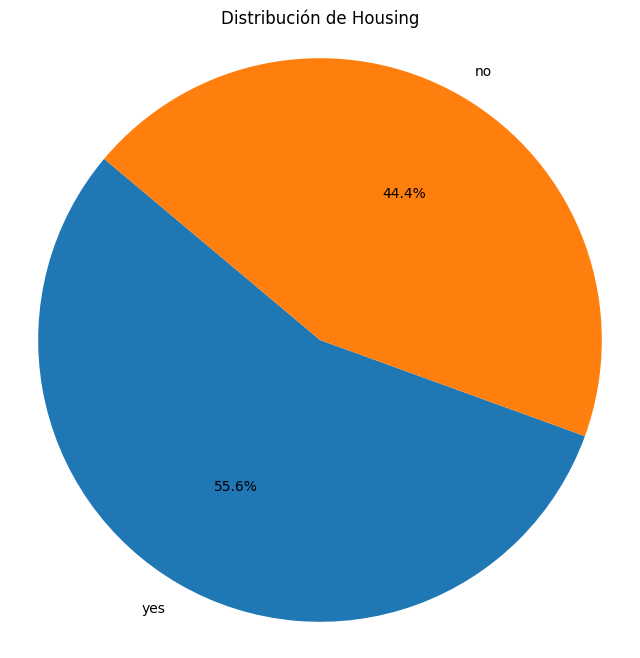

In [118]:
# Contar la frecuencia de cada categoría de 'housing'
housing_counts = df['housing'].value_counts()

# Crear el gráfico de tarta
plt.figure(figsize=(8, 8))  # Tamaño del gráfico
plt.pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)

# Añadir un título
plt.title('Distribución de Housing')

# Mostrar el gráfico
plt.axis('equal')  # Hace que el gráfico sea circular
plt.show()


### Loan

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14196\3842468906.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan', data=df, palette='colorblind')


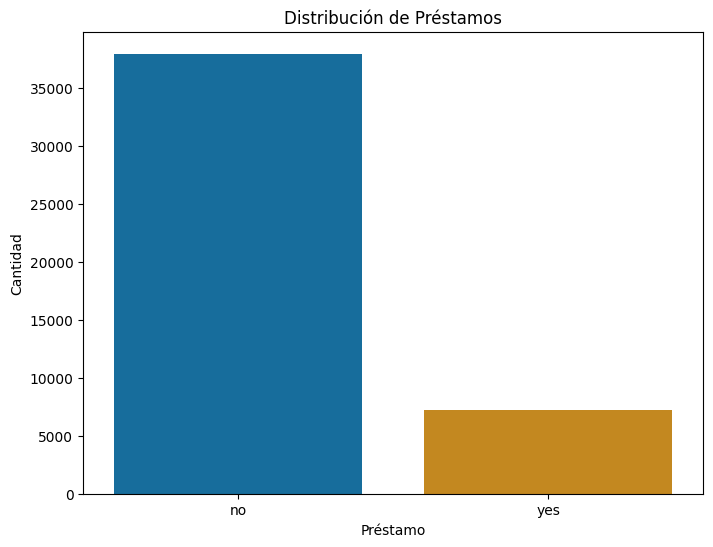

In [119]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.countplot(x='loan', data=df, palette='colorblind')

# Personalizar el gráfico
plt.title('Distribución de Préstamos')  # Título del gráfico
plt.xlabel('Préstamo')  # Etiqueta del eje x
plt.ylabel('Cantidad')  # Etiqueta del eje y

# Mostrar el gráfico
plt.show()

### Contact

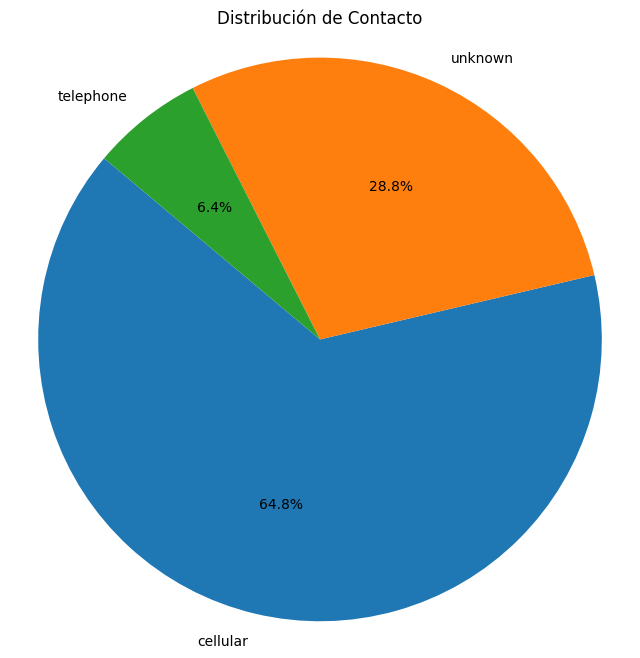

In [120]:
# Contar la frecuencia de cada categoría de 'contact'
contact_counts = df['contact'].value_counts()

# Crear el gráfico de tarta
plt.figure(figsize=(8, 8))  # Tamaño del gráfico
plt.pie(contact_counts, labels=contact_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)

# Añadir un título
plt.title('Distribución de Contacto')

# Mostrar el gráfico
plt.axis('equal')  # Hace que el gráfico sea circular
plt.show()

### Day

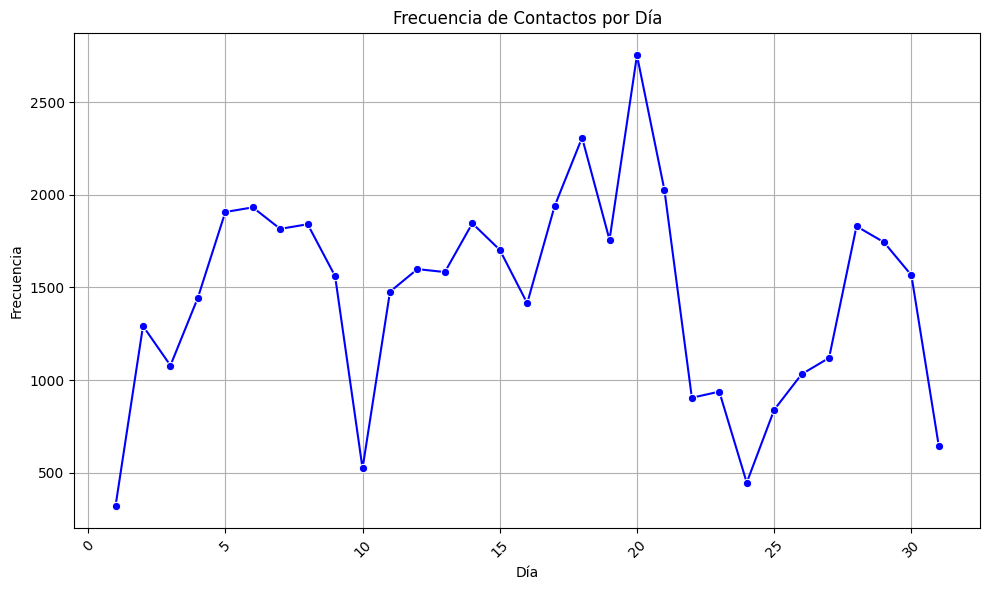

In [121]:
# Contar la frecuencia de cada día
day_counts = df['day'].value_counts()
# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.lineplot(x=day_counts.index, y=day_counts.values, marker='o', color='blue')

# Personalizar el gráfico
plt.title('Frecuencia de Contactos por Día')  # Título del gráfico
plt.xlabel('Día')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización
plt.grid(True)  # Mostrar una cuadrícula
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()

### Month

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14196\1907807891.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=df, palette='muted')


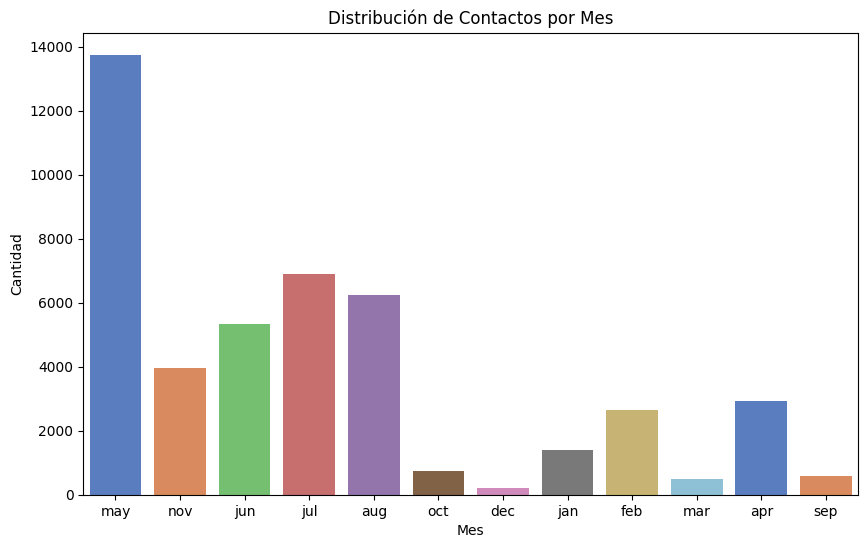

In [122]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.countplot(x='month', data=df, palette='muted')

# Personalizar el gráfico
plt.title('Distribución de Contactos por Mes')  # Título del gráfico
plt.xlabel('Mes')  # Etiqueta del eje x
plt.ylabel('Cantidad')  # Etiqueta del eje y

# Mostrar el gráfico
plt.show()

### Duration

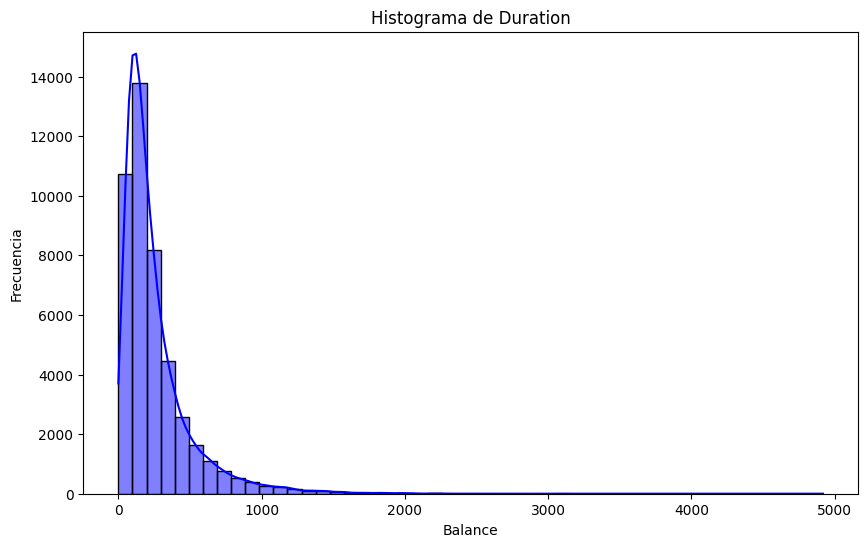

In [123]:
# Crear el histograma
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.histplot(df['duration'], bins=50, kde=True, color='blue')

# Personalizar el gráfico
plt.title('Histograma de Duration')  # Título del gráfico
plt.xlabel('Balance')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y

# Mostrar el gráfico
plt.show()

### Campaign

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14196\3076606514.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['campaign'], shade=True, color="blue")


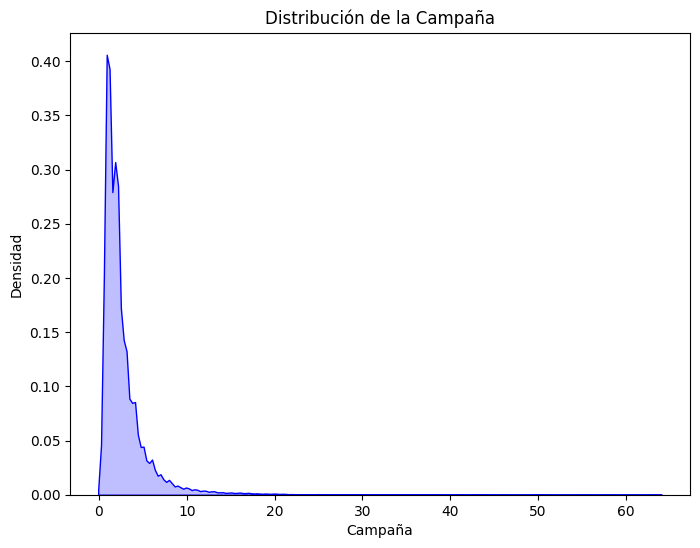

In [124]:
# Crear el gráfico de densidad
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.kdeplot(df['campaign'], shade=True, color="blue")

# Personalizar el gráfico
plt.title('Distribución de la Campaña')  # Título del gráfico
plt.xlabel('Campaña')  # Etiqueta del eje x
plt.ylabel('Densidad')  # Etiqueta del eje y

# Mostrar el gráfico
plt.show()

### Pdays

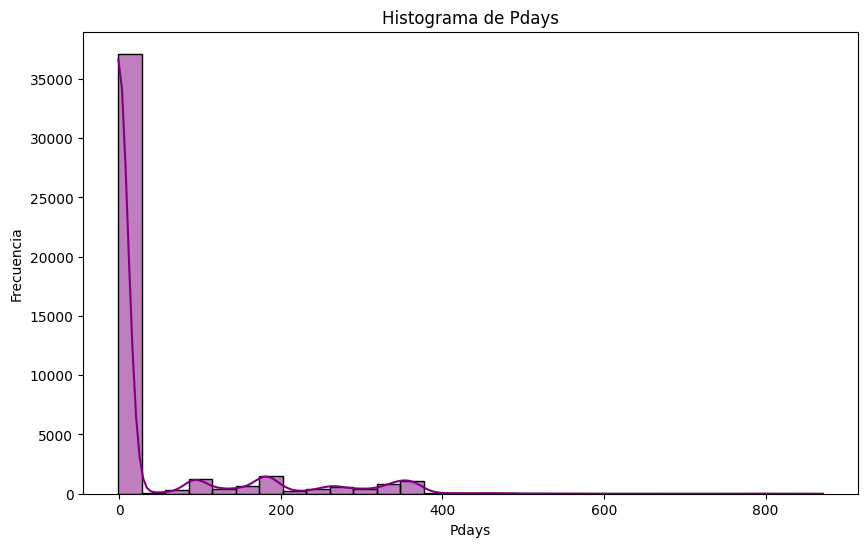

In [125]:
# Crear el histograma
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.histplot(df['pdays'], bins=30, kde=True, color='purple')

# Personalizar el gráfico
plt.title('Histograma de Pdays')  # Título del gráfico
plt.xlabel('Pdays')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y

# Mostrar el gráfico
plt.show()


### Previous

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14196\1679038327.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['previous'], shade=True, color="blue")


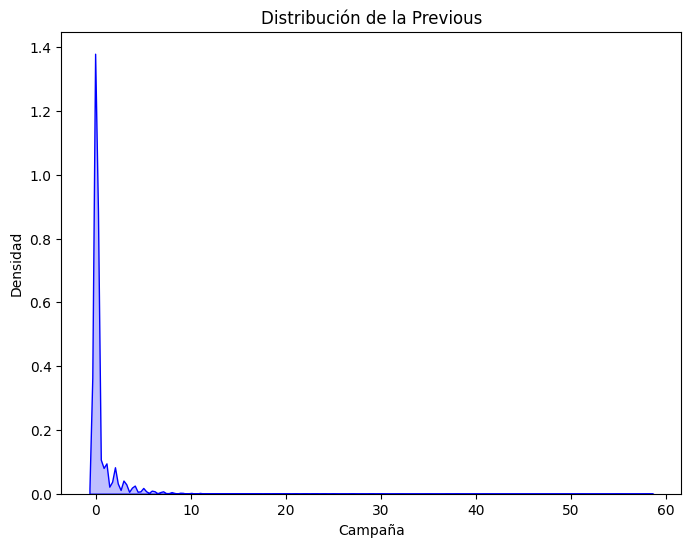

In [126]:
# Crear el gráfico de densidad
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.kdeplot(df['previous'], shade=True, color="blue")

# Personalizar el gráfico
plt.title('Distribución de la Previous')  # Título del gráfico
plt.xlabel('Campaña')  # Etiqueta del eje x
plt.ylabel('Densidad')  # Etiqueta del eje y

# Mostrar el gráfico
plt.show()

### Poutcome

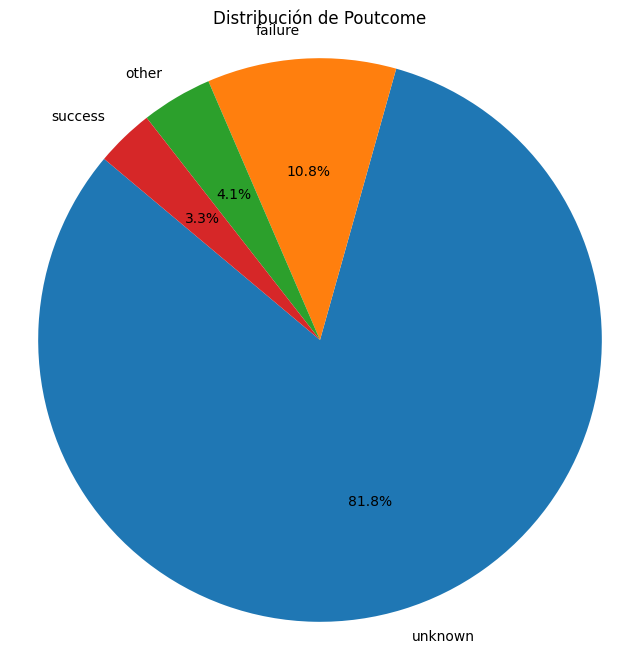

In [127]:
# Contar la frecuencia de cada categoría en 'poutcome'
poutcome_counts = df['poutcome'].value_counts()

# Crear el gráfico de tarta
plt.figure(figsize=(8, 8))  # Tamaño del gráfico
plt.pie(poutcome_counts, labels=poutcome_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)

# Personalizar el gráfico
plt.title('Distribución de Poutcome')  # Título del gráfico

# Mostrar el gráfico
plt.axis('equal')  # Mantener las proporciones iguales para que sea un círculo
plt.show()


### Y

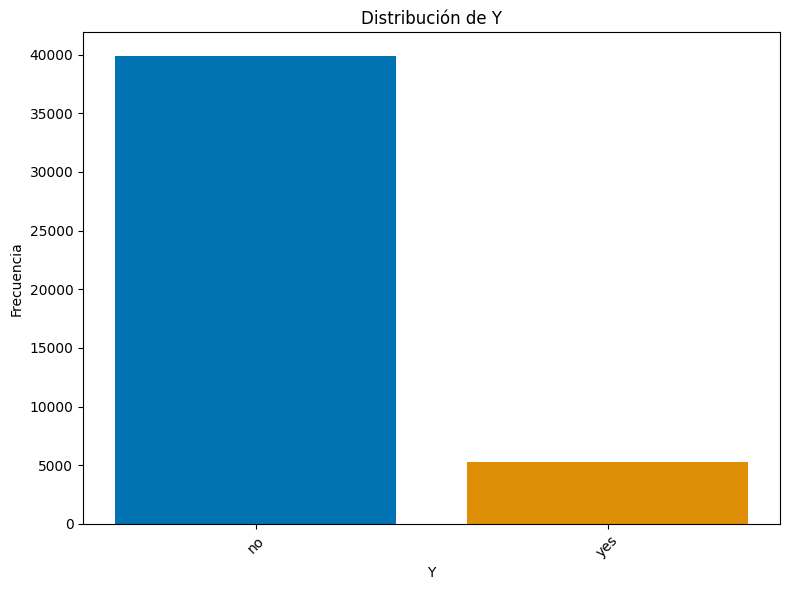

In [128]:
# Contar la frecuencia de cada categoría en 'y'
y_counts = df['y'].value_counts()

# Crear una paleta de colores utilizando Seaborn
colors = sns.color_palette('colorblind')

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.bar(y_counts.index, y_counts, color=colors)

# Personalizar el gráfico
plt.title('Distribución de Y')  # Título del gráfico
plt.xlabel('Y')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()

## Análisis bivariante

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14196\2890195210.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='balance', data=df_filtered, palette='colorblind')


Text(0, 0.5, 'Balance')

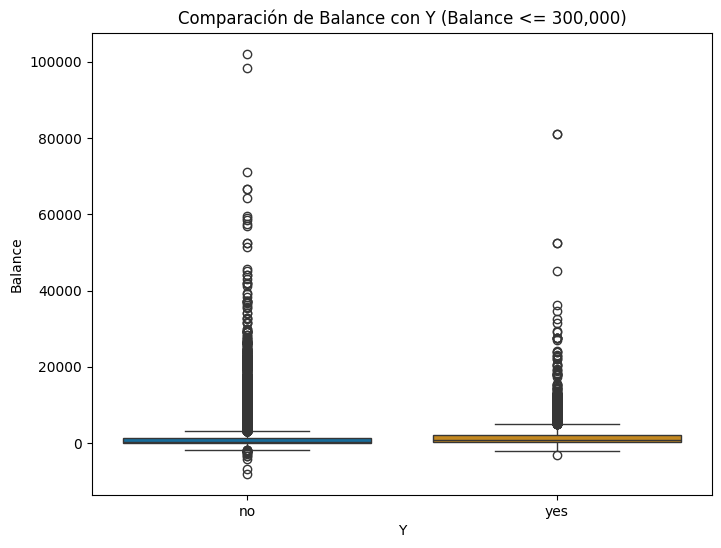

In [129]:
# Filtrar el DataFrame para excluir las personas con balance superior a 300,000
df_filtered = df[df['balance'] <= 300000]

# Crear el gráfico de caja
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='balance', data=df_filtered, palette='colorblind')

# Personalizar el gráfico
plt.title('Comparación de Balance con Y (Balance <= 300,000)')  # Título del gráfico
plt.xlabel('Y')  # Etiqueta del eje x
plt.ylabel('Balance')  # Etiqueta del eje


<Figure size 1000x600 with 0 Axes>

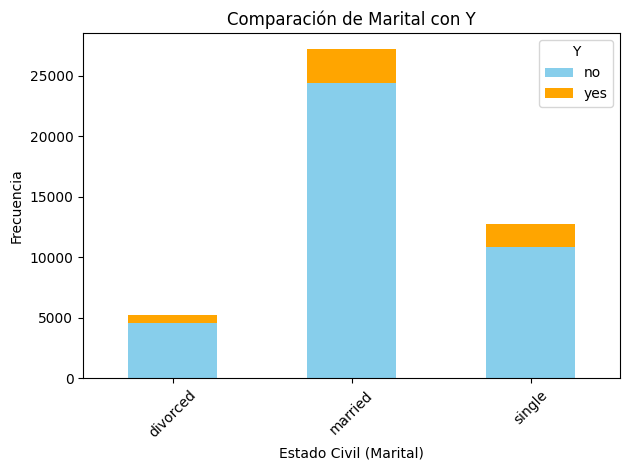

In [130]:
# Calcular la frecuencia de cada categoría de 'marital' para cada valor de 'y'
marital_y_counts = df.groupby(['marital', 'y']).size().unstack()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
marital_y_counts.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])

# Personalizar el gráfico
plt.title('Comparación de Marital con Y')  # Título del gráfico
plt.xlabel('Estado Civil (Marital)')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización
plt.legend(title='Y', loc='upper right')  # Añadir leyenda

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Análisis multivariante

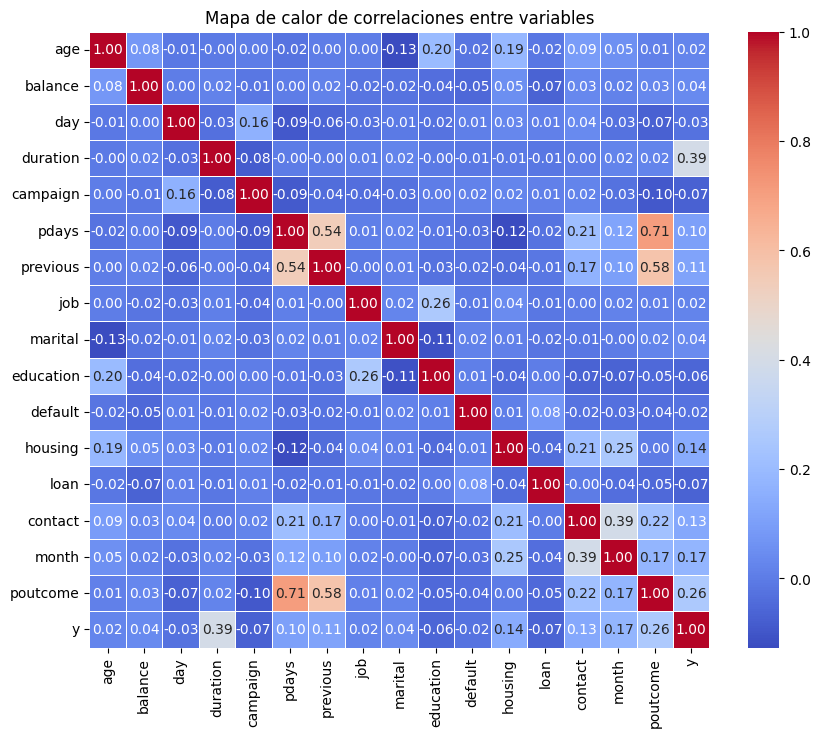

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las variables numéricas
numeric_cols = df.select_dtypes(include=['number'])

# Obtener las variables categóricas
categorical_cols = df.select_dtypes(include=['object'])

# Factorizar las variables categóricas
categorical_cols_factorized = categorical_cols.apply(lambda x: pd.factorize(x)[0])

# Concatenar las variables numéricas y categóricas factorizadas
data_concatenated = pd.concat([numeric_cols, categorical_cols_factorized], axis=1)

# Calcular la matriz de correlación
correlation_matrix = data_concatenated.corr()

# Crear el mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor de correlaciones entre variables')
plt.show()

